In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [4]:
red=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
white=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")
red['type']=1
white['type']=0
wines=pd.concat([red,white],ignore_index=True)
wines.dropna(inplace=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


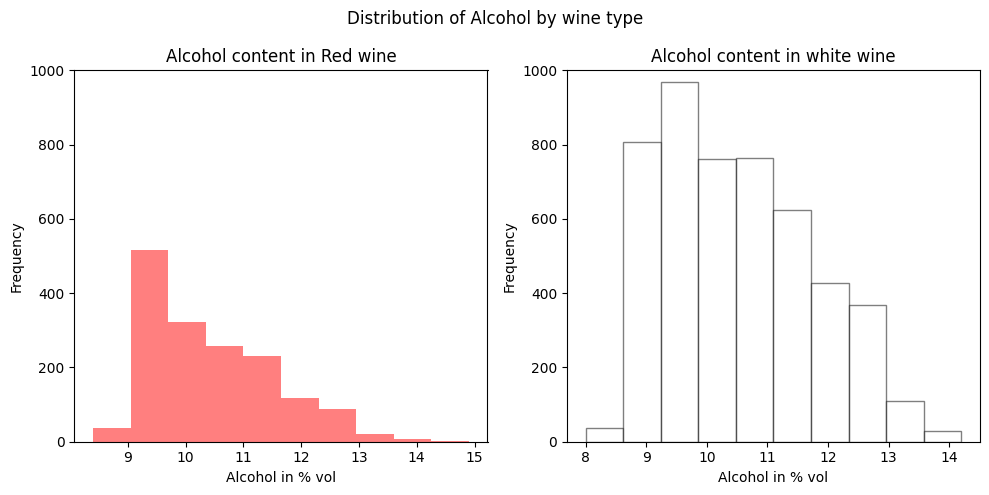

In [6]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(wines[wines['type']==1].alcohol,bins=10,facecolor='red',alpha=0.5,label='Red wine')
ax[1].hist(wines[wines['type']==0].alcohol,bins=10,facecolor='white',edgecolor='black',lw=0.5,alpha=0.5,label='White wine')

for a in ax:
  a.set_ylim([0,1000])
  a.set_xlabel('Alcohol in % vol')
  a.set_ylabel('Frequency')

ax[0].set_title('Alcohol content in Red wine')
ax[1].set_title('Alcohol content in white wine')

fig.suptitle('Distribution of Alcohol by wine type')
plt.tight_layout()
plt.show()

In [7]:
  X=wines.iloc[:,:-1]
  y=wines['type']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.34,random_state=45)

In [8]:
model=Sequential()
model.add(Dense(12,activation='relu',input_dim=12))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.fit(X_train,y_train,epochs=3,batch_size=1,verbose=1)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9051 - loss: 0.2389
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9443 - loss: 0.1549
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9596 - loss: 0.1190


In [10]:
y_pred=model.predict(X_test)
y_pred_labels=(y_pred>=0.5).astype(int)

for prediction in y_pred_labels[:12]:
  wine_type="Red wine" if prediction==1 else "White wine"
  print(f"Prediction: {wine_type}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: Red wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
